In [2]:
write("example.wav", sampleRate, raw.astype(np.int16))
wav1=wa.open('example.wav','r')
noise=wav1.readframes(-1)
noise=np.frombuffer(noise,"int16")
noise_sampleRate=wav1.getframerate()

plt.title('Waveform of Audio File')
plt.plot(time,noise,color='red',label='noisy')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.legend()
plt.xlim(0,2)
plt.show()

NameError: name 'write' is not defined

In [24]:
import wave as wa
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from playsound import playsound

In [25]:
plt.rcParams['figure.figsize']=[9,6]
plt.rcParams.update({'font.size': 12})

In [26]:
wav=wa.open('hello.wav','r')
raw=wav.readframes(-1)
raw=np.frombuffer(raw,"int16")
sampleRate=wav.getframerate()
time=np.linspace(0,len(raw)/sampleRate,num=len(raw))
#raw_clean=raw
#raw with noise
#raw=raw+2.5*np.random.randn(len(time))

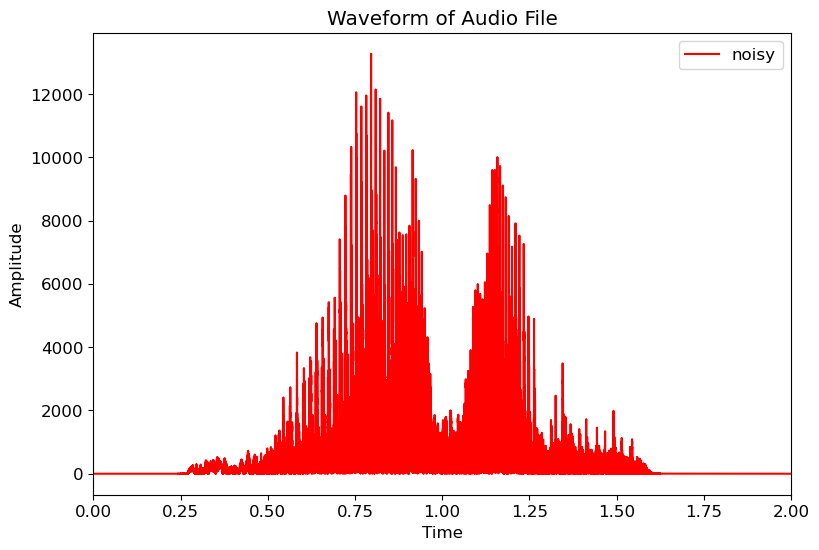

In [53]:
plt.title('Waveform of Audio File')
plt.plot(time,abs(raw),color='red',label='noisy')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.legend()
plt.xlim(0,2)
plt.show()

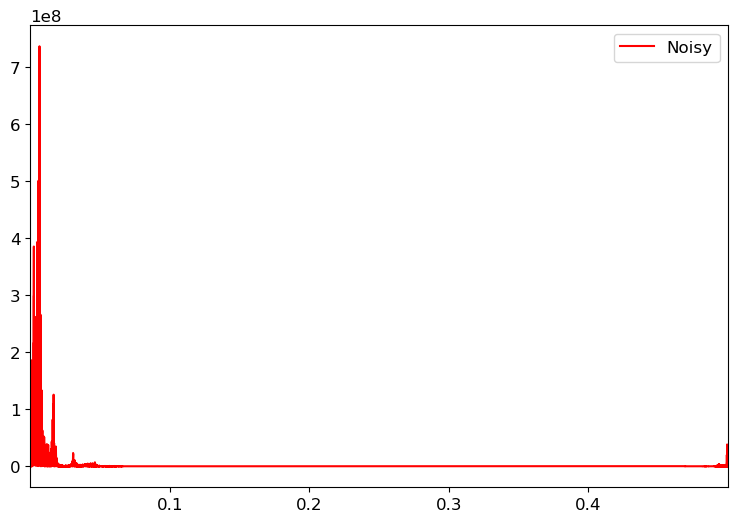

In [28]:
#compute the fft
n=len(time)
fhat=np.fft.fft(raw,n)
PSD=fhat*np.conj(fhat)/n
freq=(1/(len(raw)/sampleRate))*time
L=np.arange(1,np.floor(n/2),dtype='int')

plt.plot(freq[L],PSD[L],color='red',label='Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

In [56]:
#use the PSD to filter out noise
M=max(abs(raw))
indices=PSD>7
PSDclean=PSD*indices
fhat=fhat*indices
ffilt=np.fft.ifft(fhat)

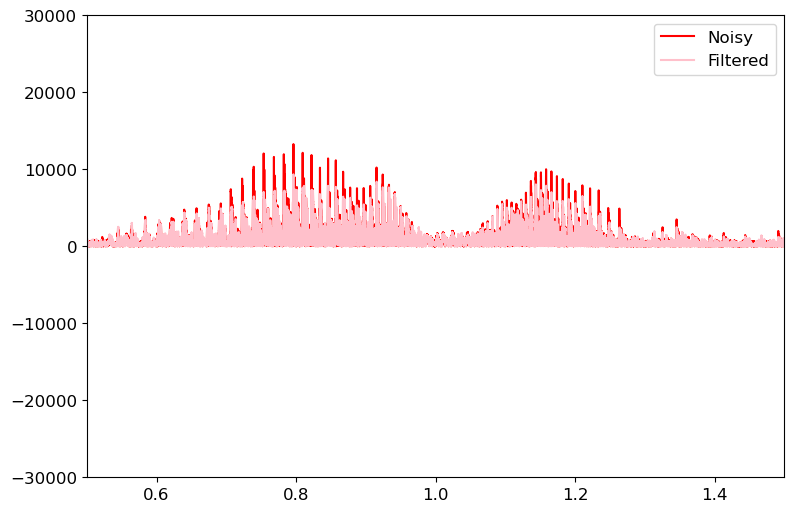

In [57]:
#plot everything together

plt.plot(time,abs(raw),color='red',label='Noisy')
plt.plot(time,abs(ffilt),color='pink',label='Filtered')
plt.xlim(0.5,1.5)
plt.ylim(-30000,30000)
plt.legend()

plt.show()

In [58]:
write("result1.wav", sampleRate, ffilt.astype(np.int16))

/var/folders/wf/606tgcgx6rq99xkrjhnpc30m0000gn/T/ipykernel_51267/1872834998.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  write("result1.wav", sampleRate, ffilt.astype(np.int16))


In [59]:
playsound('hello.wav')
playsound('result1.wav')